# Statistics for Data Science.


- URL: https://www.learndatasci.com/tutorials/data-science-statistics-using-python/

#### By: Sagun Shakya
- GITAM Institute of Science

## Description of the problem:

- A public school administrator makes statistical research regarding the poor performance of the students in the school.

## Data Set:
- https://raw.githubusercontent.com/LearnDataSci/article-resources/master/Essential%20Statistics/middle_tn_schools.csv

## Parameters used with their description:
- __Variable:                             Definition__
- name	  :                      The name of the school
- school_rating	 :               The school's rating
- size	          :              The school's student count
- reduced_lunch	   :             The percentage of students that got enrolled in reduced lunch
- state_percentile_16:	        The school's percentile in 2016
- state_percentile_15:	        The school's percentile in 2015
- stu_teach_ratio	  :          The school's student to teacher ratio
- school_type	       :         The type of school (public, private, magnet, alternative, etc)
- avg_score_15	        :        The school's average test score for 2015
- avg_score_16	         :       The school's average test score for 2016
- full_time_teachers	  :      The school's total full time teachers
- percent_black	           :     Percentage of black students at the school
- percent_white	            :    Percentage of white students at the school
- percent_asian	             :   Percentage of asian students at the school
- percent_hispanic	          :  Percentage of hispanic students at the school



- NOTE:
    - __reduced_lunch__ is a variable measuring the average percentage of students per school enrolled in a federal program that provides lunches for students from lower-income households.

## Types of statistics used:
- 1. __Descriptive statistics__: 
    - identify patterns in the data.
    - two measures used to describe the data: central tendency and deviation.
    
- 2. __Inferential Statistics__:
    - allow us to make hypotheses (or inferences) about a sample that can be applied to the population.

In [1]:
#imports for the problem.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

In [2]:
#Changing the working directory to the folder containing the .csv file.

os.chdir('D:\Sagun Shakya\Python\Basic-Statistics-and-Visualization-master')

In [3]:
df = pd.read_csv('middle_tn_schools.csv', index_col = 'name')
school = copy.deepcopy(df)                #creating a virtual copy of the original dataframe.

## Checking for null values.

In [4]:
school.isnull().sum()

school_rating          0
size                   0
reduced_lunch          0
state_percentile_16    0
state_percentile_15    6
stu_teach_ratio        0
school_type            0
avg_score_15           6
avg_score_16           0
full_time_teachers     0
percent_black          0
percent_white          0
percent_asian          0
percent_hispanic       0
dtype: int64

In [5]:
#dropping null values.
school.dropna(inplace = True)
school.isnull().sum()

school_rating          0
size                   0
reduced_lunch          0
state_percentile_16    0
state_percentile_15    0
stu_teach_ratio        0
school_type            0
avg_score_15           0
avg_score_16           0
full_time_teachers     0
percent_black          0
percent_white          0
percent_asian          0
percent_hispanic       0
dtype: int64

## Dimension of the dataframe.

In [6]:
school.shape

(341, 14)

In [7]:
sub = school[['reduced_lunch', 'school_rating']]

## Statistical Summary for the numerical data.

In [8]:
school.describe()

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,2.982405,704.923754,49.920821,59.063930,58.249267,15.459824,57.004692,57.261877,45.302053,21.007331,61.803519,2.670088,11.186510
std,1.685487,400.970851,25.379175,32.445386,32.702630,5.728366,26.696450,27.873337,22.025513,23.314544,27.066237,3.125867,12.082311
min,0.000000,53.000000,2.000000,0.500000,0.600000,7.300000,1.500000,1.900000,2.000000,0.000000,1.100000,0.000000,0.000000
25%,2.000000,424.000000,30.000000,31.700000,27.100000,13.700000,37.600000,37.600000,30.000000,3.700000,41.400000,0.800000,3.800000
50%,3.000000,606.000000,50.000000,67.600000,65.800000,15.000000,61.800000,60.800000,41.000000,13.500000,68.700000,1.600000,6.400000
75%,4.000000,851.000000,71.000000,88.200000,88.600000,16.600000,79.600000,80.500000,55.000000,28.000000,85.900000,3.100000,13.800000
max,5.000000,2314.000000,98.000000,99.800000,99.800000,111.000000,99.000000,98.900000,140.000000,97.400000,99.700000,21.100000,65.200000


- __reduced_lunch__ is a good proxy for household income which, in turn, must be correlated with the schools' performance.

- Using __groupby__  and __describe__ method.

In [12]:
sub = school[['reduced_lunch', 'school_rating']]
sub.groupby(['school_rating']).describe()

reduced_lunch                                                  \
                      count       mean        std   min    25%   50%    75%   
school_rating                                                                 
0.0                    42.0  83.500000   8.903959  53.0  79.25  86.0  90.00   
1.0                    38.0  74.894737  11.943085  53.0  65.00  74.5  84.75   
2.0                    43.0  63.976744  11.933323  37.0  54.50  62.0  73.50   
3.0                    56.0  50.285714  13.550866  24.0  41.00  48.5  63.00   
4.0                    85.0  40.458824  16.002643   4.0  30.00  41.0  50.00   
5.0                    77.0  21.610390  17.766879   2.0   8.00  19.0  30.00   

                     
                max  
school_rating        
0.0            98.0  
1.0            98.0  
2.0            88.0  
3.0            78.0  
4.0            86.0  
5.0            87.0

In [13]:
sub.corr()

,reduced_lunch,school_rating
reduced_lunch,1.000000,-0.818037
school_rating,-0.818037,1.000000


### Creating a Box - and - Whisker Plot.

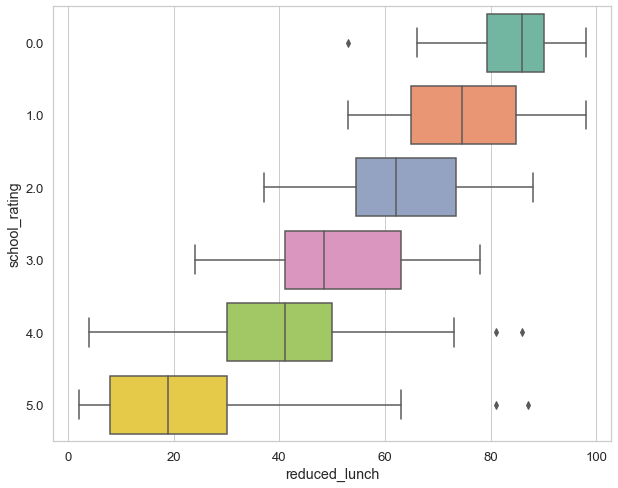

In [14]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.boxplot(x = 'reduced_lunch', y = 'school_rating', data = school, palette = 'Set2', orient='h')
plt.show()

#### Conclusion:
- The higher rated schools have lower proportions of students having the 'reduced_lunch' scheme.

## Linear Correlation between 'reduced_lunch' and 'school_rating'.

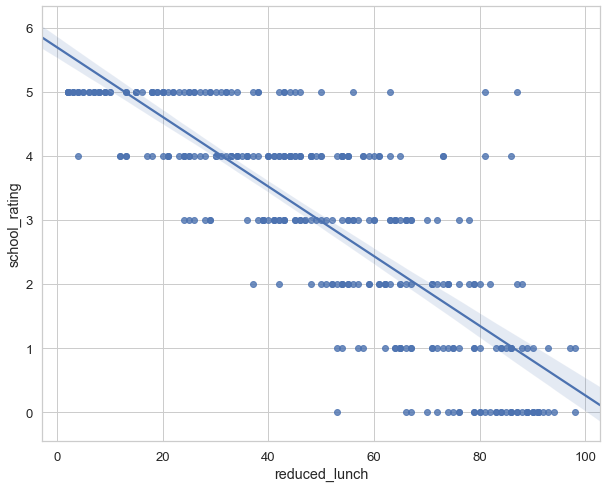

In [16]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.regplot(y = school['school_rating'], x= school['reduced_lunch'], scatter= True, marker='o', color = 'b' )
plt.show()

#### Conclusion:
- There exists a negative correlation between these two variables meaning that as the number of students having the 'reduced_lunch' scheme increases in a school, the rating can decrease (can be set up for hypothesis testing in the later stages of the same research).

## Creating a heatmap (correlation matrix) for checking which variables further affect the school_rating.

In [17]:
school.corr()

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
school_rating,1.000000,0.174402,-0.818037,0.985476,0.937817,0.199151,0.941336,0.982491,0.114626,-0.606631,0.656134,0.156934,-0.387348
size,0.174402,1.000000,-0.268493,0.165095,0.162887,0.140678,0.161788,0.136475,0.966971,-0.136791,0.092990,0.189146,-0.017239
reduced_lunch,-0.818037,-0.268493,1.000000,-0.819148,-0.825085,-0.201650,-0.839536,-0.820004,-0.201282,0.561948,-0.674078,-0.220604,0.499779
state_percentile_16,0.985476,0.165095,-0.819148,1.000000,0.949694,0.181639,0.949197,0.994116,0.110210,-0.587216,0.643632,0.145926,-0.395358
state_percentile_15,0.937817,0.162887,-0.825085,0.949694,1.000000,0.141066,0.991847,0.946101,0.109569,-0.564929,0.612183,0.181822,-0.371708
stu_teach_ratio,0.199151,0.140678,-0.201650,0.181639,0.141066,1.000000,0.147963,0.168907,0.018855,-0.118310,0.131754,0.090224,-0.090983
avg_score_15,0.941336,0.161788,-0.839536,0.949197,0.991847,0.147963,1.000000,0.953714,0.105186,-0.595062,0.637500,0.192656,-0.374300
avg_score_16,0.982491,0.136475,-0.820004,0.994116,0.946101,0.168907,0.953714,1.000000,0.081931,-0.604458,0.651621,0.168011,-0.385862
full_time_teachers,0.114626,0.966971,-0.201282,0.110210,0.109569,0.018855,0.105186,0.081931,1.000000,-0.100514,0.044505,0.140614,0.027066
percent_black,-0.606631,-0.136791,0.561948,-0.587216,-0.564929,-0.118310,-0.595062,-0.604458,-0.100514,1.000000,-0.870971,-0.109107,0.083822


In [18]:
cor = school.corr().columns.values
print(cor)
print(type(cor))

['school_rating' 'size' 'reduced_lunch' 'state_percentile_16'
 'state_percentile_15' 'stu_teach_ratio' 'avg_score_15' 'avg_score_16'
 'full_time_teachers' 'percent_black' 'percent_white' 'percent_asian'
 'percent_hispanic']
<class 'numpy.ndarray'>


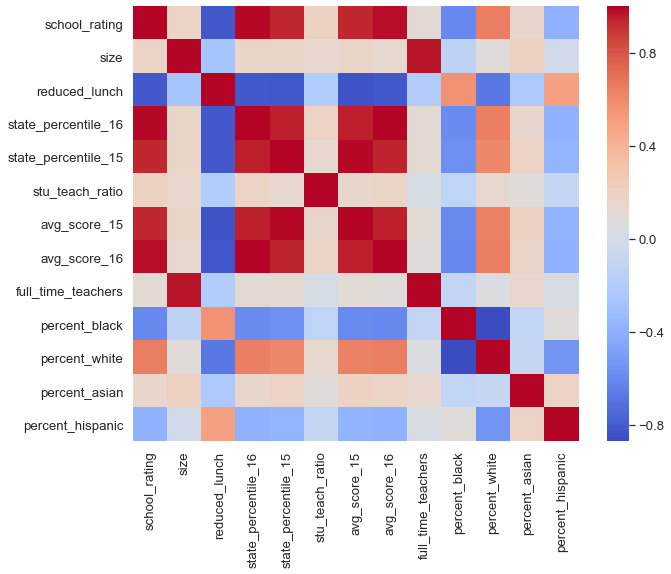

"\nDescription of the figure:\n- Red cells indicate positive correlation.\n- Blue cells indicate negative correlation.\n- White cells indicate no correlation. \n- The darker the colors, the stronger the correlation (positive or negative) between those two variables as indicated by\n  cmap = 'coolwarm'.\n"

In [19]:

plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.heatmap(data=school.corr(), xticklabels=cor, yticklabels=cor, cmap = 'coolwarm')
plt.show()

'''
Description of the figure:
- Red cells indicate positive correlation.
- Blue cells indicate negative correlation.
- White cells indicate no correlation. 
- The darker the colors, the stronger the correlation (positive or negative) between those two variables as indicated by
  cmap = 'coolwarm'.
'''

## The End.

### Prepared by: Sagun Shakya
- GITAM Institute of Science.